Let's clarify what ROC-curves can tell us about our data and models and compare ROC AUC to other metrics.

In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

def get_ground_truth(n = 100, p = [0.5, 0.5], **kwargs):
    return np.random.choice([0, 1], n, p = p)

def get_predictions(x, classifier = 'same', constant = 0.5, smoothing = 0, **kwargs):
    OPTIONS = ['same', 'opposite', 'random', 'random_continious', 'constant']
    option_string = ', '.join(f'"{option}"' for option in OPTIONS[:-1]) + ' or ' + f'"{OPTIONS[-1]}"'
    assert classifier in OPTIONS, f'Unknown classifier. Classifier should be either {option_string}'
    if classifier == 'same':
        pred = x
        return np.abs(pred - smoothing)
    elif classifier == 'opposite':
        pred = 1 - x
        return np.abs(pred - smoothing)
    elif classifier == 'random':
        n = x.shape
        return np.random.random(n)
    elif classifier == 'constant':
        return np.full_like(x, constant, dtype=np.double)

def plot(x, title = ''):
    plt.clf()
    plt.title(title)
    plt.show(plt.plot(x[0],x[1]))


def visualize_curve(**kwargs):
    true = get_ground_truth(**kwargs)
    pred = get_predictions(true, **kwargs)
    pred_bin = np.round(pred)
    title = f'ROC AUC: {roc_auc_score(true, pred)}\nAccuracy:{accuracy_score(true, pred_bin)} Precision:{precision_score(true, pred_bin)} Recall:{recall_score(true, pred_bin)}'

    plot(roc_curve(true, pred), title)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# All predictions are correct (ROC AUC = 1)

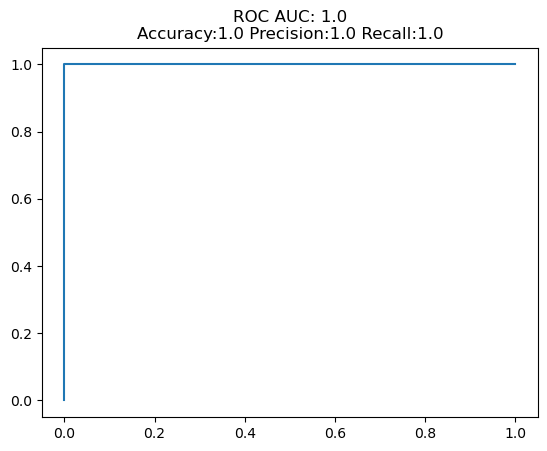

In [2]:
visualize_curve(classifier = 'same')

# All predictions are incorrect (ROC AUC = 0)

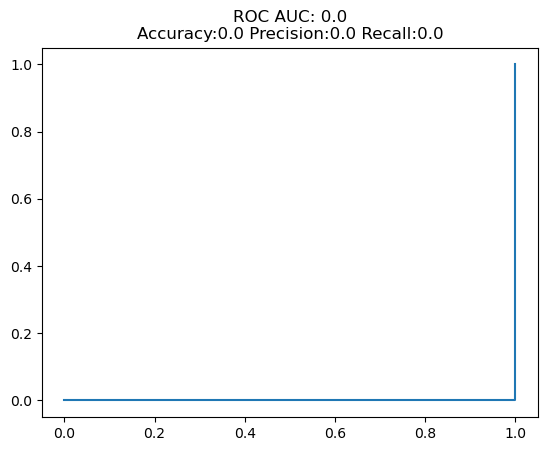

In [3]:
visualize_curve(classifier = 'opposite')

# Constant Predictions (ROC AUC = 0.5)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


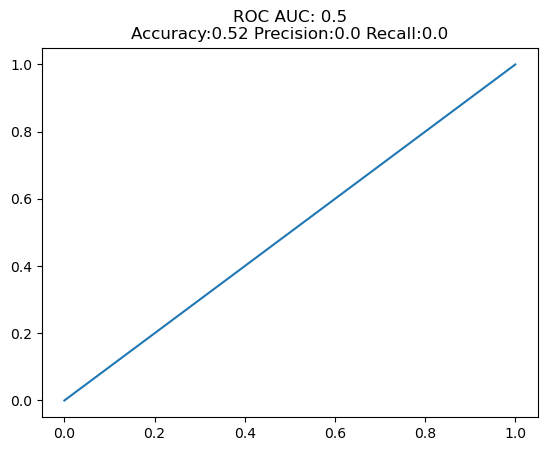

In [4]:
#Predictions of 0.5
visualize_curve(classifier = 'constant')

Model always predicts: 0.2436466825016328


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


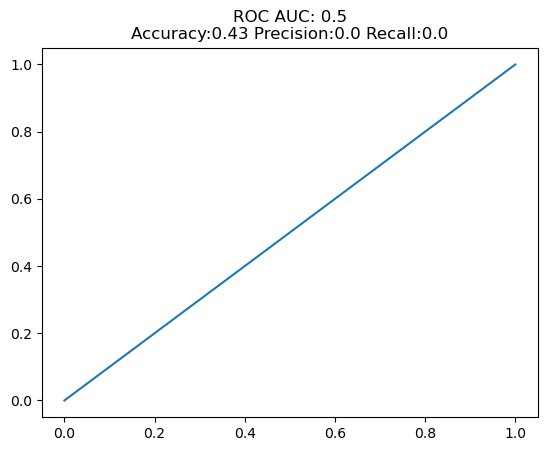

In [5]:
#Any constant prediction
constant = np.random.rand()
print(f'Model always predicts: {constant}')
visualize_curve(classifier = 'constant', constant = constant)

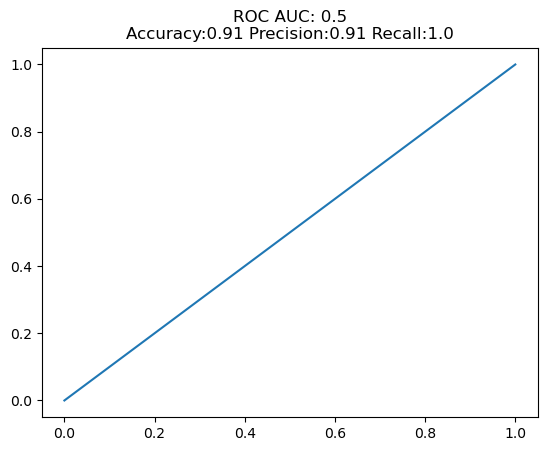

In [6]:
#If the model always gives 1 as prediction, ROC AUC is still 0.5 while other metrics are close to 1.
#It is important if data is imbalanced and we care about the minotiry class
visualize_curve(classifier = 'constant', constant = 1, p = [0.05, 0.95])

# Random Predictions (ROC AUC ~ 0.5)

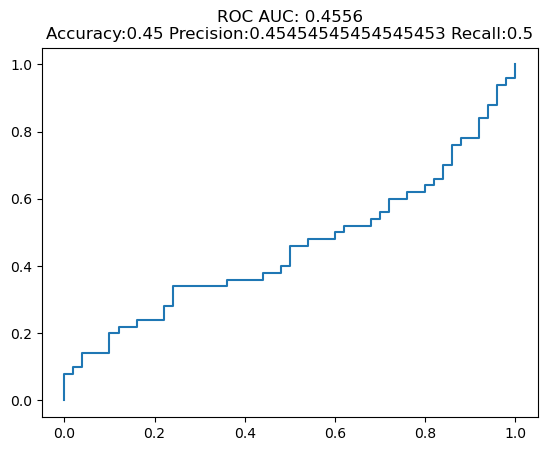

In [7]:
visualize_curve(classifier = 'random')

Dataset size: 1000


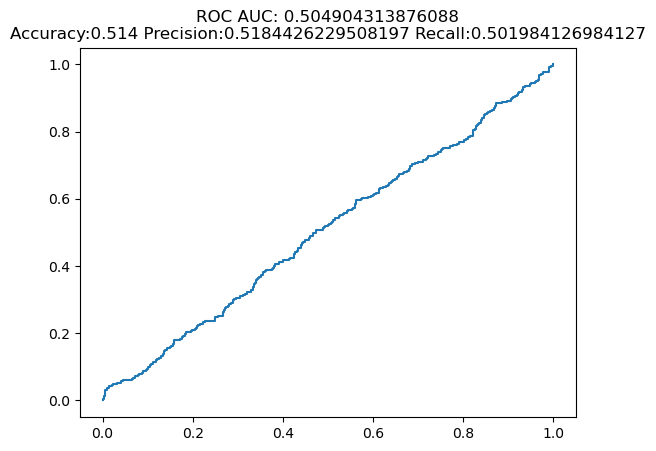

Dataset size: 10000


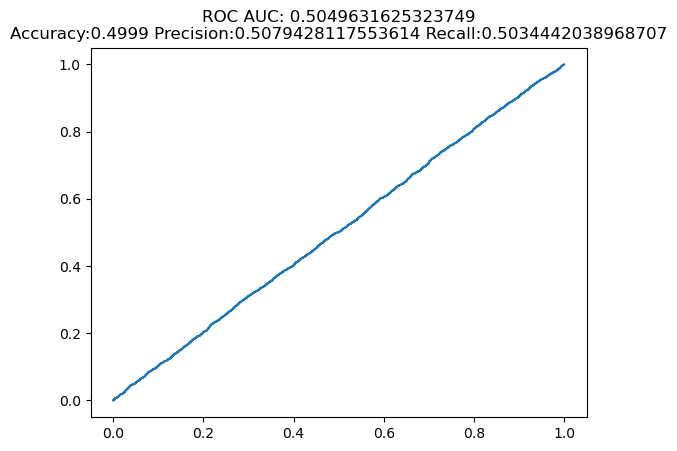

Dataset size: 100000


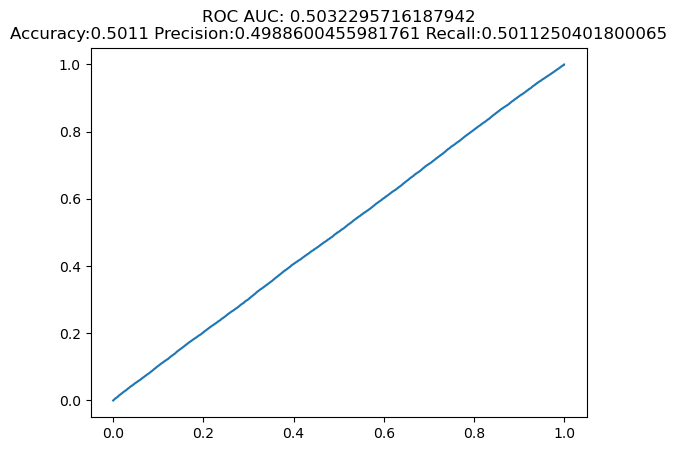

In [8]:
#If we increase dataset size the curve will become smoother until it becomes a line

for n in [1e3, 1e4, 1e5]:
    n = int(n)
    print(f'Dataset size: {n}')
    visualize_curve(classifier = 'random', n = n)

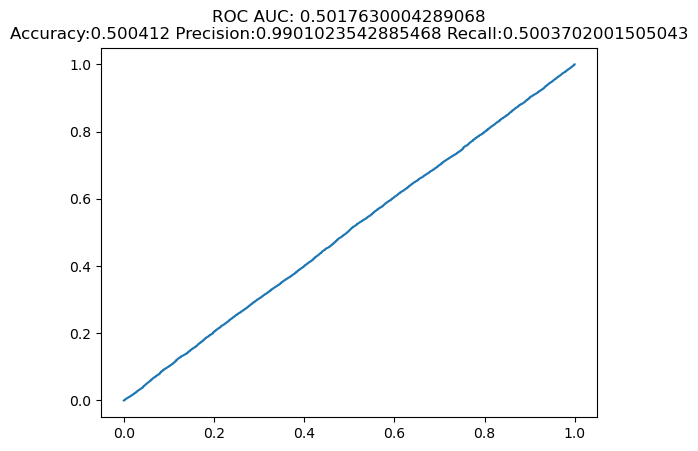

In [9]:
#ROC curve doesn't depend on class imbalance
visualize_curve(classifier = 'random', p = [0.01, 0.99], n = int(10e5))